In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics 

# Load data
data = pd.read_csv('heart-disease.csv')

x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values.reshape(-1,1)
y = y.reshape(len(y),1)

print(x.shape)
print(y.shape)

# Train / Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

# Activation Functions
def sigmoid(v):
    return 1/(1+np.exp(-v))

def sigmoid_derivative(v):
    return sigmoid(v) * (1 - (1/(1+np.exp(-v))))
    
def crossEntrop(o,y):
    return (-y*(np.log(o)) - (1-y)* np.log(1-o))

def crossEntrDeriv(o,y):
    return -(y/o - (1-y)/(1-o))

# Initial Parameters
input_nodes = x.shape[1]
hidden_nodes = 5
output_nodes = 1
learning_rate = 0.01
epochs = 500
mini_batch = 128

np.random.seed(42)
w1 = np.random.uniform(-1, 1, (input_nodes, hidden_nodes))
b1 = np.zeros((1, hidden_nodes))
w2 = np.random.uniform(-1, 1, (hidden_nodes, output_nodes))
b2 = np.zeros((1, output_nodes))

train_E = []
train_Acc = []
test_E = []
test_Acc = []

# Originally had shuffled data again here, however removed as it caused unnecessary issues with training and testing
for epoch in range(epochs):
    train_error_epoch = []
    train_acc_epoch = []

    for i in range(0, len(x_train), mini_batch):
        x_batch = x_train[i:i + mini_batch]
        y_batch = y_train[i:i + mini_batch]

        # Forward pass
        in1 = x_batch @ w1 + b1
        out1 = sigmoid(in1)
        in2 = out1 @ w2 + b2
        out2 = sigmoid(in2)

        # Error
        error = crossEntrop(out2, y_batch).mean()
        train_error_epoch.append(error)

        # Compute accuracy
        pred_train = (out2 > 0.5).astype(int)
        train_acc_epoch.append(metrics.accuracy_score(y_batch, pred_train))

        # Backpropagation L2
        dEdOut2 = crossEntrDeriv(out2, y_batch)
        dOut2dIn2 = sigmoid_derivative(in2)
        dIn2dW2 = out1
        dIn2dB2 = 1
        dEdW2 = (1 / x_batch.shape[0]) * dIn2dW2.T @ (dEdOut2 * dOut2dIn2)
        dEdB2 = (1 / x_batch.shape[0]) * np.ones([1, x_batch.shape[0]]) @ (dEdOut2 * dOut2dIn2)

        # Backpropagation L1
        dIn2dOut1 = w2
        dOut1dIn1 = sigmoid_derivative(in1)
        dIn1dW1 = x_batch
        dEdW1 = (1 / x_batch.shape[0]) * dIn1dW1.T @ ((dEdOut2 * dOut2dIn2 @ dIn2dOut1.T) * dOut1dIn1)
        dEdB1 = (1 / x_batch.shape[0]) * np.ones([len(x_batch)]) @ ((dEdOut2 * dOut2dIn2 @ dIn2dOut1.T) * dOut1dIn1)

        # Update Params
        b2 -= learning_rate * dEdB2
        w2 -= learning_rate * dEdW2
        b1 -= learning_rate * dEdB1
        w1 -= learning_rate * dEdW1

    # Store final values
    train_E.append(np.mean(train_error_epoch))
    train_Acc.append(np.mean(train_acc_epoch))

    # Compute Test Loss and Accuracy
    in1_test = x_test @ w1 + b1
    out1_test = sigmoid(in1_test)
    in2_test = out1_test @ w2 + b2
    out2_test = sigmoid(in2_test)

    test_E.append(crossEntrop(out2_test, y_test).mean())
    pred_test = np.where(out2_test > 0.5, 1, 0)
    test_Acc.append(metrics.accuracy_score(y_test, pred_test))

    if epoch % 50 == 0:
        print(f"Epoch {epoch} - Train Loss: {train_E[-1]:.4f}, Test Loss: {test_E[-1]:.4f}")

# Final Values
training_final_loss = train_E[-1]
training_final_acc = train_Acc[-1]
testing_final_loss = test_E[-1]
testing_final_acc = test_Acc[-1]
print(f"Final Training Loss: {training_final_loss:.4f}, Final Training Accuracy: {training_final_acc:.4f}")
print(f"Final Testing Loss: {testing_final_loss:.4f}, Final Testing Accuracy: {testing_final_acc:.4f}")

(303, 13)
(303, 1)
Epoch 0 - Train Loss: 0.7259, Test Loss: 0.7007
Epoch 50 - Train Loss: 0.6898, Test Loss: 0.6881
Epoch 100 - Train Loss: 0.6892, Test Loss: 0.6871
Epoch 150 - Train Loss: 0.6889, Test Loss: 0.6850
Epoch 200 - Train Loss: 0.6886, Test Loss: 0.6836
Epoch 250 - Train Loss: 0.6808, Test Loss: 0.6804
Epoch 300 - Train Loss: 0.6722, Test Loss: 0.6781
Epoch 350 - Train Loss: 0.6677, Test Loss: 0.6758
Epoch 400 - Train Loss: 0.6638, Test Loss: 0.6740
Epoch 450 - Train Loss: 0.6606, Test Loss: 0.6712
Final Training Loss: 0.6567, Final Training Accuracy: 0.6868
Final Testing Loss: 0.6635, Final Testing Accuracy: 0.6230


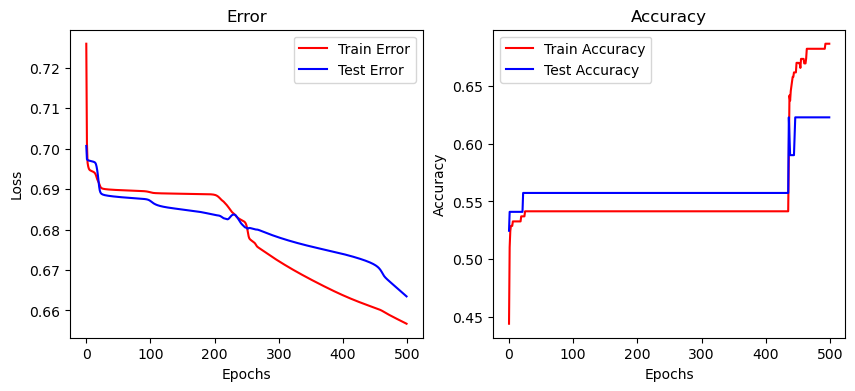

In [16]:
# Plotting Loss and Accuracy graphs across epochs
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
z = np.arange(epochs)
plt.plot(z, train_E, label="Train Error", color='red')
plt.plot(z, test_E, label="Test Error", color='blue')
plt.legend(loc='best')
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(z, train_Acc, label="Train Accuracy", color='red')
plt.plot(z, test_Acc, label="Test Accuracy", color='blue')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

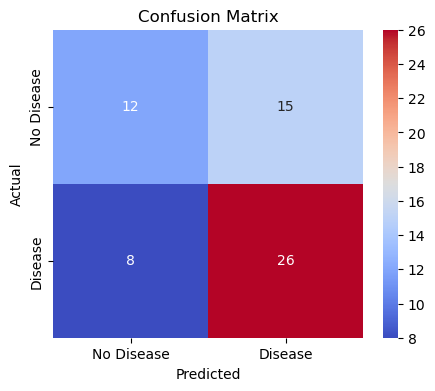


Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.44      0.51        27
           1       0.63      0.76      0.69        34

    accuracy                           0.62        61
   macro avg       0.62      0.60      0.60        61
weighted avg       0.62      0.62      0.61        61



In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, pred_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels = ["No Disease", "Disease"], yticklabels = ["No Disease", "Disease"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, pred_test))

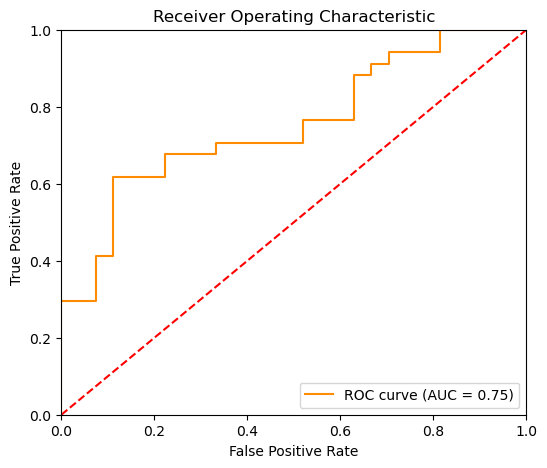

In [12]:
# ROC Curve and AUC
pred_prob = out2_test  # Predicted probability for positive class
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()